## Adjacency List

In [1]:
all_edges = [
    ("A", "B"), ("A", "C"), ("B", "D"), ("C", "D"), ("C", "E"), ("D", "E")
]

In [2]:
class Graph:
    def __init__(self, Nodes, is_directed=False):
        self.nodes = Nodes
        self.adj_list = {}
        self.is_directed = is_directed
        for node in self.nodes:
            self.adj_list[node] = []
            
    def add_edge(self, u, v):
        self.adj_list[u].append(v)
        
        if not self.is_directed:
            self.adj_list[v].append(u)

    def degree(self, node):
        deg = len(self.adj_list[node])
        return deg
    
    def print_adj_list(self):
        for node in self.nodes:
            print(node, "->", self.adj_list[node])

In [4]:
nodes = ["A", "B", "C", "D", "E"]
graph = Graph(nodes, is_directed=True)
graph1 = Graph(nodes)
graph.print_adj_list()
graph1.print_adj_list()

for u,v in all_edges:
    graph.add_edge(u, v)
    
for u,v in all_edges:
    graph1.add_edge(u, v)

    
print("")
print("Graph_1: ")
print(graph.print_adj_list())
print("Graph_2: ")
print(graph1.print_adj_list())

a = str(input())
print ("Degree of ", a, "in Graph_1 is: ", graph.degree(a))
print ("Degree of ", a, "in Graph_2 is: ", graph1.degree(a))


A -> []
B -> []
C -> []
D -> []
E -> []
A -> []
B -> []
C -> []
D -> []
E -> []

Graph_1: 
A -> ['B', 'C']
B -> ['D']
C -> ['D', 'E']
D -> ['E']
E -> []
None
Graph_2: 
A -> ['B', 'C']
B -> ['A', 'D']
C -> ['A', 'D', 'E']
D -> ['B', 'C', 'E']
E -> ['C', 'D']
None
D
Degree of  D in Graph_1 is:  1
Degree of  D in Graph_2 is:  3


## BFS

Breadth-First Search (BFS) traverses the graph systematically, level by level, forming a BFS tree along the way. Unlike trees, graphs may contain cycles, so we may come to the same node again. To avoid processing a node more than once, we divide the vertices into two categories:
1. Visited and
2. Not visited.

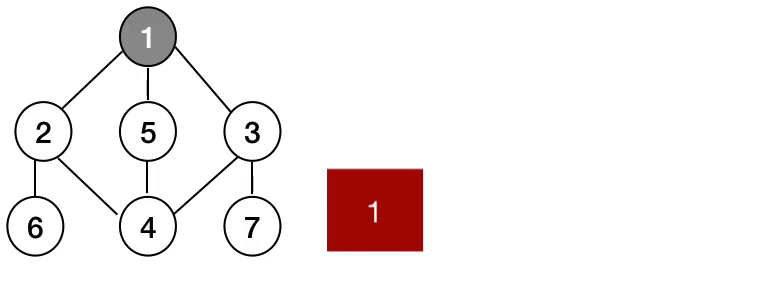

### Algorithm
The purpose of the algorithm is to mark each vertex as visited while avoiding cycles. The algorithm works as follows:

1. Start by putting any one of the graph's vertices at the back of a queue.
2. Take the front item of the queue and add it to the visited list.
3. Create a list of that vertex's adjacent nodes. Add the ones which aren't in the visited list to the back of the queue.
4. Keep repeating steps 2 and 3 until the queue is empty.

The graph might have two different disconnected parts so to make sure that we cover every vertex, we can also run the BFS algorithm on every node.

### BFS algorithm applications

1. To build index by search index
2. For GPS navigation
3. Path finding algorithms
4. In Ford-Fulkerson algorithm to find maximum flow in a network
5. Cycle detection in an undirected graph
6. In minimum spanning tree

Source: https://www.programiz.com/dsa/graph-bfs

In [7]:
from collections import defaultdict

In [8]:
class Graph:
    def __init__(self):
        self.graph = defaultdict(list)
    
    #Create graph
    def addEdge(self, u, v):
        self.graph[u].append(v)
        
    #Sorting with BFS
    def BFS(self, s):
        #Set all nodes as not visited
        visited = [False] * (max(self.graph) + 1)
        
        #Empty queue to temporarily store node values after it is visited
        queue = []
        queue.append(s)
        #Set node as visited
        visited[s] = True
        
        #Until the queue is empty
        while queue:
            
            #Pop visited nodes and print"
            s = queue.pop(0)
            print(s, end = " ")
            
            
            for i in self.graph[s]:
                if visited[i] == False:
                    queue.append(i)
                    visited[i] = True
                    


In [12]:
g = Graph()
g.addEdge(0, 2)
g.addEdge(0, 6)
g.addEdge(1, 4)
g.addEdge(2, 0)
g.addEdge(2, 5)
g.addEdge(3, 4)
g.addEdge(4, 1)
g.addEdge(4, 5)
g.addEdge(4, 6)
g.addEdge(5, 2)
g.addEdge(5, 3)
g.addEdge(5, 4)
g.addEdge(6, 0)
g.addEdge(6, 4)
 
start = int(input())
print ("Following is Breadth First Traversal (starting from vertex", start, ")")
g.BFS(start)

2
Following is Breadth First Traversal (starting from vertex 2 )
2 0 5 6 3 4 1 

## Topological sorting

Topological sort is an algorithm that takes a directed acyclic graph and returns the sequence of nodes where every node will appear before other nodes that it points to. Topological sorting for graphs is not applicable if the graph is not a Directed Acyclic Graph (DAG). The ordering of the nodes in the array is called topological ordering. 

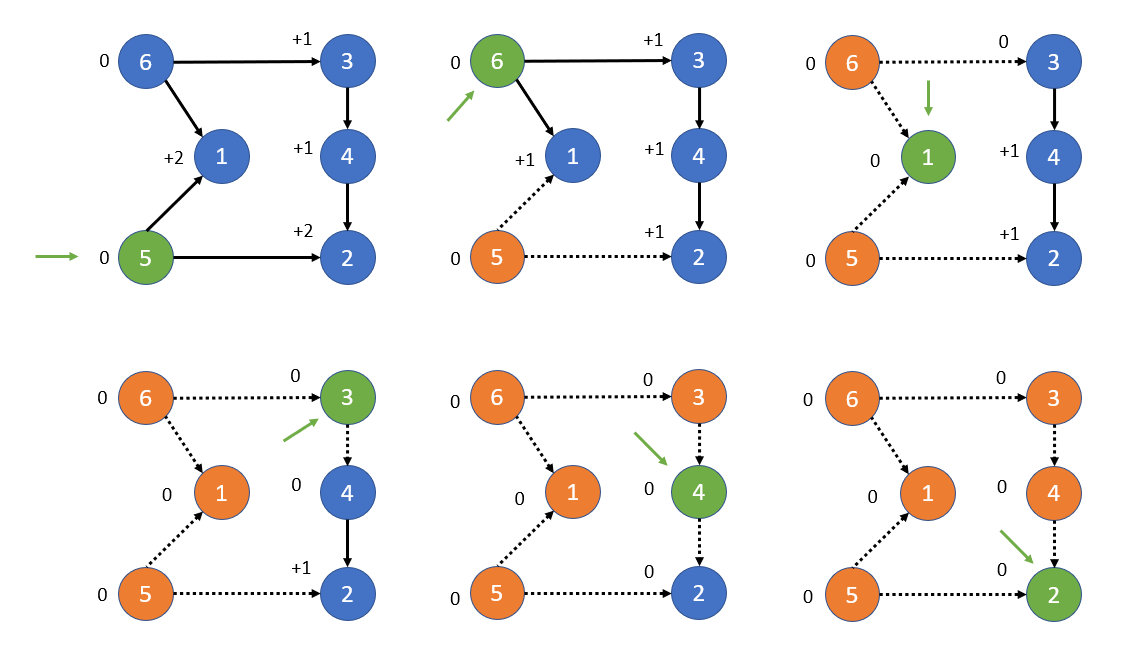

### Algorithm

1. Identify the node that has no in-degree(no incoming edges) and select that node as the source node of the graph
2. Delete the source node with zero in-degree and also delete all its outgoing edges from the graph. Insert the deleted vertex in the result array
3. Update the in-degree of the adjacent nodes after deleting the outgoing edges
4. Repeat step 1 to step 3 until the graph is empty

### Applications 

1. Topological sort can be used to quickly find the shortest paths from the weighted directed acyclic graph
2. It is used to check whether there exists a cycle in the graph or not
3. Topological sort is useful to find the deadlock condition in an operating system
4. It is used in course scheduling problems to schedule jobs
5. It is used to find the dependency resolution
6. Topological sort is very useful to find sentence ordering in very fewer efforts
7. It is used in manufacturing workflows or data serialization in an application
8. It is used for ordering the cell evaluation while recomputing formula values in an excel sheet or spreadsheet

Source: https://favtutor.com/blogs/topological-sort-python

In [17]:
from collections import defaultdict

In [27]:
class Graph:

    def __init__(self,n):

        self.graph = defaultdict(list)

        self.N = n

    def addEdge(self,m,n):

        self.graph[m].append(n)

    def sortUtil(self,n,visited,stack):

        visited[n] = True

        for element in self.graph[n]:

            if visited[element] == False:

                self.sortUtil(element,visited,stack)

        stack.insert(0,n)

    def topologicalSort(self):

        visited = [False]*self.N

        stack =[]

        for element in range(self.N):

            if visited[element] == False:

                self.sortUtil(element,visited,stack)

        print(stack)


In [29]:
graph = Graph(5)
graph.addEdge(0,1);
graph.addEdge(0,3);
graph.addEdge(1,2);
graph.addEdge(2,3);
graph.addEdge(2,4);
graph.addEdge(3,1);

print("The Topological Sort Of The Graph Is:  ")

graph.topologicalSort()

The Topological Sort Of The Graph Is:  
[0, 1, 2, 4, 3]


## DFS

The Depth-First Search is a recursive algorithm that uses the concept of backtracking. It involves thorough searches of all the nodes by going ahead if potential, else by backtracking. Here, the word backtrack means once you are moving forward and there are not any more nodes along the present path, you progress backward on an equivalent path to seek out nodes to traverse. All the nodes are progressing to be visited on the current path until all the unvisited nodes are traversed after which subsequent paths are going to be selected.

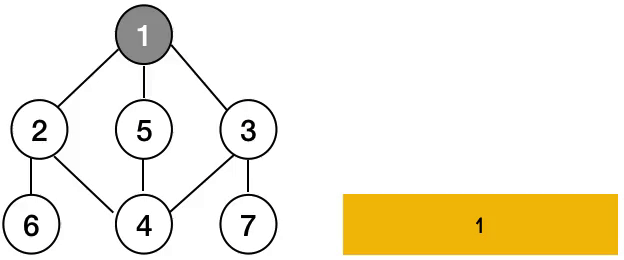

### Algorithm

1. Start by putting any one of the graph's vertex on top of the stack
2. After that take the top item of the stack and add it to the visited list of the vertex
3. Next, create a list of that adjacent node of the vertex. Add the ones which aren't in the visited list of vertexes to the top of the stack
4. Lastly, keep repeating steps 2 and 3 until the stack is empty

Source: https://favtutor.com/blogs/depth-first-search-python

In [34]:
class Graph:
    
    #constractor
    def __init__(self):
        
        #ditionary to store graph
        self.graph =defaultdict(list)
        
    def addEdge(self, u, v):
        self.graph[u].append(v)
        
    #Function used by DFS
    def DFSUtil(self, v, visited):
        
        #Set node as visitd and print
        visited.add(v)
        print(v, end=' ')
        
        for i in self.graph[v]:
            if i not in visited:
                self.DFSUtil(i, visited)
                
    #DFS
    def DFS(self, v):
        
        #Create set to store visited vertices
        visited = set()
        
        self.DFSUtil(v, visited)

In [36]:
if __name__ == '__main__':
    g = Graph()
    g.addEdge(0,1)
    g.addEdge(0,2)
    g.addEdge(1,2)
    g.addEdge(2,0)
    g.addEdge(2,3)
    g.addEdge(3,3)
    
    start = int(input())
    print("Following is DFS starting from ", start)
    g.DFS(start)
    

1
Following is DFS starting from  1
1 2 0 3 